#Import

This code imports the system executable and operating system

In [1]:
import sys
print("Python Executable Path:", sys.executable) #String that contains absolute path to Python interpreter
import os #imports operating system (desktop)
print("Operating System Desktop Path:", os.getcwd())


Python Executable Path: /Users/mmandig/miniconda3/bin/python
Operating System Desktop Path: /Users/mmandig/Desktop


This code imports the Biopython and Pandas package

In [2]:
from Bio import SeqIO # Import Biopython's Sequence Input/Output interface
from Bio.Seq import Seq   # Import Biopython's Seq class
from Bio.SeqIO.FastaIO import SimpleFastaParser #Imports Parser for Large Files   
import pandas as pd       # Import Pandas for data manipulation
import numpy as np 
import math as math       # Import scientific and mathematic calculations
import matplotlib.pyplot as plt #Import matplotlib for visualizations

#Test

Testing Biopython and Pandas


In [3]:
# Test Biopython
#seq = Seq("AGTACACTGGT")
#print(seq)

# Test Pandas
#data = pd.DataFrame({"Column1": [1, 2, 3], "Column2": ["A", "B", "C"]})
#print(data)


#Fasta File

Reading File Data

In [4]:
file_path = "HIV1_ALL_2022_env_PRO.fasta"

#The SeqIO allows to parse the data frame

sequence_records = []
with open(file_path) as fasta_file:
        for record in SeqIO.parse(fasta_file , "fasta"):
            sequence_records.append({
                "Header": str(record.id),
                "Sequence": (record.seq)  
            })

seq_df = pd.DataFrame.from_records(sequence_records)



#Categorizing

Manipulating the sequence headers of subtype.country.year.sequence_id.sequence_accession_number into the sequences' respective categories.
Creating a dataframe for these sequence headers



In [5]:
#This code is a trial of renaming names of the column headers
#seq_df = seq_df.assign(
 #   subtype=None,
 #   country=None,
  #  year=None,
  #  sequence_id=None,
  #  sequence_accession_number=None
#)

#print(seq_df)




#replace none with the values from the sequences?

Accessing the first string test

In [6]:
#Accessing the first string which is the header
#seq_header = seq_df["Header"][0]

#print(seq_header)
    

Iterating over the other strings

In [7]:
#This code splits the header sequence from their periods (.)

#for i in seq_df["Header"]:
   # id = i.split(".")
  #  print(id)

This code performs functions that converts, splits, renames, and inserts variables, columns, and data types in the dataframe

In [8]:


#This line creates a seperate table for the sequence data and converts it into a string 
seq_data = seq_df["Sequence"].astype(str)

#This line splits the string into five categories and creates 5 columns
id = seq_df['Header'].str.split(".", n = 4 ,expand=True)
id.rename(columns={0: "Subtype", 1: "Country", 2: "Year", 3: "Sequence ID", 4: "Sequence Accession Number"}, inplace= 'TRUE')
id.insert(5, "Sequence Data", seq_data) 
id

,Subtype,Country,Year,Sequence ID,Sequence Accession Number,Sequence Data
0,B,FR,83,HXB2_LAI_IIIB_BRU,K03455,MRVK--EKY--Q---HL-W-------R-WG---W------------...
1,A,CD,87,P4039,MH705157,MRVM--GTR--R----N-Y-------P-RL---W------------...
2,A,CH,03,HIV_CH_BID_V3538_2003,JQ403028,MRVM--GMQ--R----N-Y-------P-HW---W------------...
3,A,ZA,04,04ZASK162B1,DQ396400,MRVM--ETQ--R----N-Y-------P-RW---W------------...
4,A,ZA,09,707PKE02N3,HM623589,MRVR--GTQ--M----N-C-------Q-GW---W------------...
...,...,...,...,...,...,...
10728,N,CM,95,YBF30_patent,HV199816,MKVM--GMQ-------S-GW-----MGM------------------...
10729,N,CM,97,YBF106,AJ271370,M-----GMQ-------S-G---------------------------...
10730,N,FR,11,N1_FR_2011,JN572926,MRVM--GMK-------S-Y---------------------------...
10731,P,CM,06,U14788,HQ179987,----------------------------------------------...


This code identifies the 'x' value in Year and Country removes it

In [9]:

id = id[~id["Year"].isin(["x"]) & ~id["Country"].isin(["x"])]

display(id)
print(id.shape)




,Subtype,Country,Year,Sequence ID,Sequence Accession Number,Sequence Data
0,B,FR,83,HXB2_LAI_IIIB_BRU,K03455,MRVK--EKY--Q---HL-W-------R-WG---W------------...
1,A,CD,87,P4039,MH705157,MRVM--GTR--R----N-Y-------P-RL---W------------...
2,A,CH,03,HIV_CH_BID_V3538_2003,JQ403028,MRVM--GMQ--R----N-Y-------P-HW---W------------...
3,A,ZA,04,04ZASK162B1,DQ396400,MRVM--ETQ--R----N-Y-------P-RW---W------------...
4,A,ZA,09,707PKE02N3,HM623589,MRVR--GTQ--M----N-C-------Q-GW---W------------...
...,...,...,...,...,...,...
10728,N,CM,95,YBF30_patent,HV199816,MKVM--GMQ-------S-GW-----MGM------------------...
10729,N,CM,97,YBF106,AJ271370,M-----GMQ-------S-G---------------------------...
10730,N,FR,11,N1_FR_2011,JN572926,MRVM--GMK-------S-Y---------------------------...
10731,P,CM,06,U14788,HQ179987,----------------------------------------------...


(9975, 6)


This code converts the year into an int 

In [10]:

id["Year"] = pd.to_numeric(id["Year"], errors="coerce")

#Drop rows where Year could not be converted
id = id.dropna(subset=["Year"])

#Convert the values to integer
id["Year"] = id["Year"].astype(int)
print(id)

      Subtype Country  Year            Sequence ID Sequence Accession Number  \
0           B      FR    83      HXB2_LAI_IIIB_BRU                    K03455   
1           A      CD    87                  P4039                  MH705157   
2           A      CH     3  HIV_CH_BID_V3538_2003                  JQ403028   
3           A      ZA     4            04ZASK162B1                  DQ396400   
4           A      ZA     9             707PKE02N3                  HM623589   
...       ...     ...   ...                    ...                       ...   
10728       N      CM    95           YBF30_patent                  HV199816   
10729       N      CM    97                 YBF106                  AJ271370   
10730       N      FR    11             N1_FR_2011                  JN572926   
10731       P      CM     6                 U14788                  HQ179987   
10732       P      FR     6                 RBF168                  GQ328744   

                                       

/var/folders/l1/19jvgx017kgctbbr17ykrxk00000gn/T/ipykernel_1948/2619861226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id["Year"] = pd.to_numeric(id["Year"], errors="coerce")


#Unique Numbers

This code obtains the unique numbers and sorts it by descending order in the dataframe

In [11]:
#Gap between 22 and 76 so cut-off value is < 75

unique_num = id['Year'].drop_duplicates()
unique_num_sort = unique_num.sort_values()
print(unique_num_sort)

65       0
88       1
14       2
2        3
3        4
28       5
20       6
21       7
22       8
4        9
135     10
23      11
164     12
49      13
193     14
50      15
51      16
236     17
239     18
240     19
619     20
812     21
3625    22
9214    76
3626    78
3628    79
3633    81
1126    82
0       83
3652    84
319     85
168     86
1       87
1818    88
1633    89
169     90
54      91
243     92
170     93
6       94
175     95
178     96
7       97
182     98
27      99
Name: Year, dtype: int64


This code appends the values so years that are < than 75 have a 20 appended to the front

In [12]:
#Adjust the years


if id["Year"].max() < 3000:  
    id.loc[id["Year"] < 75, "Year"] += 2000
    id.loc[(id["Year"] > 75) & (id["Year"] < 2000), "Year"] += 1900



display(id)  

,Subtype,Country,Year,Sequence ID,Sequence Accession Number,Sequence Data
0,B,FR,1983,HXB2_LAI_IIIB_BRU,K03455,MRVK--EKY--Q---HL-W-------R-WG---W------------...
1,A,CD,1987,P4039,MH705157,MRVM--GTR--R----N-Y-------P-RL---W------------...
2,A,CH,2003,HIV_CH_BID_V3538_2003,JQ403028,MRVM--GMQ--R----N-Y-------P-HW---W------------...
3,A,ZA,2004,04ZASK162B1,DQ396400,MRVM--ETQ--R----N-Y-------P-RW---W------------...
4,A,ZA,2009,707PKE02N3,HM623589,MRVR--GTQ--M----N-C-------Q-GW---W------------...
...,...,...,...,...,...,...
10728,N,CM,1995,YBF30_patent,HV199816,MKVM--GMQ-------S-GW-----MGM------------------...
10729,N,CM,1997,YBF106,AJ271370,M-----GMQ-------S-G---------------------------...
10730,N,FR,2011,N1_FR_2011,JN572926,MRVM--GMK-------S-Y---------------------------...
10731,P,CM,2006,U14788,HQ179987,----------------------------------------------...


#Query Test

These code queries the results based on subtype, country, and year

This code queries the subtype

In [13]:
id.query('Subtype in ("B", "A")')

,Subtype,Country,Year,Sequence ID,Sequence Accession Number,Sequence Data
0,B,FR,1983,HXB2_LAI_IIIB_BRU,K03455,MRVK--EKY--Q---HL-W-------R-WG---W------------...
1,A,CD,1987,P4039,MH705157,MRVM--GTR--R----N-Y-------P-RL---W------------...
2,A,CH,2003,HIV_CH_BID_V3538_2003,JQ403028,MRVM--GMQ--R----N-Y-------P-HW---W------------...
3,A,ZA,2004,04ZASK162B1,DQ396400,MRVM--ETQ--R----N-Y-------P-RW---W------------...
4,A,ZA,2009,707PKE02N3,HM623589,MRVR--GTQ--M----N-C-------Q-GW---W------------...
...,...,...,...,...,...,...
4172,B,ZA,1986,R1296,MH234639,MRVK--GTR--K----N-Y-------Q-HL---WRWG---------...
4173,B,ZA,1987,R459,MH234640,MKAK--ETR--K----N-Y-------Q-HW---W------------...
4174,B,ZA,1987,R526,MH234641,MKVK--GIR--K----N-Y-------Q-HL---W------------...
4175,B,ZA,1998,TV016,KJ948656,MRVK--ETR--K----N-C-------Q-HL---W------------...


This code queries the countries

In [14]:
id.query('Country in ("CD")')

,Subtype,Country,Year,Sequence ID,Sequence Accession Number,Sequence Data
1,A,CD,1987,P4039,MH705157,MRVM--GTR--R----N-Y-------P-RL---W------------...
14,A1,CD,2002,LA01AlPr,KU168256,MRVM--GTQ--K----S-Y-------Q-NL---W------------...
15,A1,CD,1987,2106,MH705158,MRAM--GTQ--M----N-W-------Q-NL---W------------...
16,A1,CD,1987,70641,MH705151,MRVM--GTQ--R----N-Y-------P-LL---W------------...
17,A1,CD,1987,PBS6126,MH705153,MRVI--GTQ--R----N-Y-------S-SL---W------------...
...,...,...,...,...,...,...
10610,U,CD,2002,CG_0059_01_NGSID8,KY392773,MRVM--GTQ--R----N-Y-------P-HL---W------------...
10611,U,CD,2002,CG_0062_01_NGSID10,KY392774,MRVM--GTQ--R----N-Y-------P-HL---W------------...
10612,U,CD,2002,CG_0575_02_NGSID12,KY392775,MRVR--GRQ--R----N-W-------Q-PW---G------------...
10613,U,CD,1997,KMST120,AJ401039,MRVR--EMQ--R----N-W-------Q-NL---G------------...


This code queries the years

In [15]:
#This code calls a range of years and sorts it by numerical value

# Filter the data for years between 1980 and 2000 
query_test = id.query('Year >= 1980 & Year <= 2000')

# When it gives you the range of the years you have to sort the filtered data by the 'Year' column
query_test_sorted = query_test.sort_values(by="Year")

print(query_test_sorted)

     Subtype Country  Year Sequence ID Sequence Accession Number  \
3639       B      US  1981       81NY3                  AY247224   
3638       B      US  1981       81NY2                  AY247223   
3637       B      US  1981       81NY1                  AY247222   
3636       B      US  1981        81NJ                  AY247221   
3635       B      US  1981        81GA                  AY247220   
...      ...     ...   ...         ...                       ...   
9946    A1CD      KE  2000     KER2017                  AF457056   
9937     A1C      ZA  2000       TV239                  FJ647147   
9936     A1C      ZA  2000       TV218                  KJ948661   
7245   01_AE      TH  2000     3203A14               A1.KJ953555   
397       A6      RU  2000  RU00031_A2                  JF952012   

                                          Sequence Data  
3639  MRVK--ETR--K----N-Y-------Q-HL---W------------...  
3638  MKVK--EIR--K----N-Y-------Q-HL---W------------...  
3637  MRA

In [16]:
query_test = id.query('Year == 1976')
print(query_test)

     Subtype Country  Year Sequence ID Sequence Accession Number  \
9214   01A1G      CD  1976        Z321                    M15896   

                                          Sequence Data  
9214  MKVK--GIQ--G----N-W-------Q-NW---W------------...  


#TEST STUDIES
These codes queries the test studies

In [17]:
#This code process the "HVTN 702" query

HVTN_702_query = id.query('Subtype in ("C") & Country in ("ZA") & Year >= 2016 & Year <= 2021')

print(HVTN_702_query)
#select_col
#if id.query('Subtype in ("C")'):
   # id.query('Country in ("ZA") & Year >= 2016 & Year <= 2021')
   # id.query('Year >= 2016 & Year <= 2021')



     Subtype Country  Year                      Sequence ID  \
5812       C      ZA  2016                      208_AT_SGA1   
5813       C      ZA  2016                     CAP302_B_W11   
5814       C      ZA  2016                      CAP316_B_W1   
5815       C      ZA  2016                     CAP336_B_W10   
5816       C      ZA  2016        V703_1945_090_RE_sga2A3_s   
5817       C      ZA  2017          111_30_0011_LN_DNA_SGA1   
5818       C      ZA  2017          111_30_0053_LN_DNA_SGA1   
5819       C      ZA  2017                       CAP287_W13   
5820       C      ZA  2017                      CAP288_B_W3   
5821       C      ZA  2017      V703_0514_150_RE_pblib004_s   
5822       C      ZA  2017      V703_0537_110_RE_pblib003_s   
5823       C      ZA  2017           V703_0566_160_RE_con_s   
5824       C      ZA  2017           V703_0646_051_RE_con_s   
5825       C      ZA  2017  V703_0739_110_RE_con_s_modified   
5826       C      ZA  2017           V703_0795_040_RE_c

In [18]:
#This code processes the "HVTN 706" query

HVTN_706_query = id.query('Subtype in ("B", "CRF12_BF") & Country in ("US", "AR", "IT", "MX", "PE", "PL", "ES") & Year >= 2019 & Year <= 2024')

print(HVTN_706_query)

     Subtype Country  Year                       Sequence ID  \
2330       B      PE  2019    V704_0026_231_RE_NT_pblib001_3   
2331       B      PE  2019   V704_0029_170_RE_NT_pblib001_11   
2332       B      PE  2019  V704_0298_180_RE_NT_pblib001_117   
2333       B      PE  2019    V704_0372_250_RE_NT_pblib001_7   
2334       B      PE  2019   V704_0445_180_RE_NT_pblib001_22   
...      ...     ...   ...                               ...   
3621       B      US  2019    V704_0856_240_RE_NT_pblib001_9   
3622       B      US  2020                                P2   
3623       B      US  2020              p5t5_qvoa_gag_well10   
3624       B      US  2021                                P3   
3625       B      US  2022                                P4   

     Sequence Accession Number  \
2330                  OQ912888   
2331                  ON980814   
2332                  ON980821   
2333                  OQ912889   
2334                  ON980823   
...                        

#Export

These codes aim to export the HVTN 702 and HVTN 706 queries into a FASTA file

HVTN 702 Fasta File

In [19]:
#This code exports the HVTN 702 query
#Zip merges and closes the two lists together

sequence_id = HVTN_702_query['Sequence ID']
sequence_data = HVTN_702_query['Sequence Data']
 
with open("HVTN_702_sequences.fasta", "w") as f:
    for sequence_id, sequence_data in zip(sequence_id, sequence_data):
        f.write(f">{sequence_id}\n{sequence_data}\n") #This converts the header (sequence_id) and the sequence data to a string


In [20]:

sequence_id_2 = HVTN_706_query['Sequence ID']
sequence_data_2 = HVTN_706_query['Sequence Data']
 
with open("HVTN_706_sequences.fasta", "w") as f:
    for sequence_id_2, sequence_data_2 in zip(sequence_id_2, sequence_data_2):
        f.write(f">{sequence_id_2}\n{sequence_data_2}\n")

#Verification Procedure of the Test Studies 

In [21]:
#This code verifies the HVTN 702 study

HVTN_702_query.count()




Subtype                      59
Country                      59
Year                         59
Sequence ID                  59
Sequence Accession Number    59
Sequence Data                59
dtype: int64

In [22]:
HVTN_702_query.value_counts('Country')

Country
ZA    59
Name: count, dtype: int64

In [23]:
#This code verifies the HVT 706 query

HVTN_706_query.count()

Subtype                      62
Country                      62
Year                         62
Sequence ID                  62
Sequence Accession Number    62
Sequence Data                62
dtype: int64

In [24]:
HVTN_706_query.value_counts('Country')

Country
US    42
PE    20
Name: count, dtype: int64

#TRAINING SET STUDIES 
This code queries the training set studies

In [25]:
#This code queries the sequences of HVTN 502

HVTN_502_query = id.query('Subtype in ("B") & Country in ("US", "PE", "BR", "DO", "HT", "JM", "AU") & Year >= 2004 & Year <= 2007')

print(HVTN_502_query)



     Subtype Country  Year        Sequence ID Sequence Accession Number  \
701        B      AU  2004      MS2004_37_040                  EF178338   
702        B      AU  2004      MS2004_37_056                  EF178354   
703        B      AU  2004      MS2004_37_060                  EF178358   
704        B      AU  2004        Phcsffull04                  AY818644   
705        B      AU  2006      P6_PBMC_BSL_1                  OK532539   
...      ...     ...   ...                ...                       ...   
3067       B      US  2007        SADO6038_A1                  HQ217574   
3068       B      US  2007        SPFE4120_C2                  HQ217708   
3069       B      US  2007      SubjectDay221                  GQ256645   
3070       B      US  2007  TransmitterDay221                  GQ256646   
3071       B      US  2007        WARO5662_A1                  HQ217784   

                                          Sequence Data  
701   MRVT--GIR--K----X-Y-------S-XX---X-

In [26]:
#This code queries the sequences of HVTN 503

HVTN_503_query = id.query('Subtype in ("C") & Country in ("ZA") & Year >= 2006 & Year <= 2008')

print(HVTN_503_query)

     Subtype Country  Year       Sequence ID Sequence Accession Number  \
5382       C      ZA  2006          19705993                  HQ595744   
5383       C      ZA  2006    19707346_E8_C6                  HQ615951   
5384       C      ZA  2006          19738501                  HQ595745   
5385       C      ZA  2006    2759058_F10_B6                  HQ615959   
5386       C      ZA  2006     2768732_C5_16                  HQ615952   
...      ...     ...   ...               ...                       ...   
5588       C      ZA  2008     SO706_T10b_3C                  JN681249   
5589       C      ZA  2008  TRP290_2_00_23_6                  JN681253   
5590       C      ZA  2008  TRP292_2_00_12_4                  JN681254   
5591       C      ZA  2008  TRP307_2_00_24_1                  JN681255   
5592       C      ZA  2008  TRP310_2_00_20_2                  JN681256   

                                          Sequence Data  
5382  MRVR--GIQ--R----N-W-------P-QW---W------------.

In [27]:
#This code queries the sequences of USMHRP RV144

USMHRP_RV144_query = id.query('Subtype in ("01_AE") & Country in ("TH") & Year >= 2003 & Year <= 2006')

print(USMHRP_RV144_query)

     Subtype Country  Year    Sequence ID Sequence Accession Number  \
7273   01_AE      TH  2003         TH7229                  KU168309   
7274   01_AE      TH  2004     04TH107542                  JN248318   
7275   01_AE      TH  2004     04TH328531                  JN248324   
7276   01_AE      TH  2004     04TH427990                  JN248327   
7277   01_AE      TH  2004     04TH505841                  JN248328   
...      ...     ...   ...            ...                       ...   
7388   01_AE      TH  2006      AA127a02R                  JX448279   
7389   01_AE      TH  2006      AA129a02R                  JX448289   
7390   01_AE      TH  2006      AA130a07R                  JX448301   
7391   01_AE      TH  2006  T501602_sga01                  JF297225   
7392   01_AE      TH  2006  T614109_sga02                  HQ691082   

                                          Sequence Data  
7273  MRVR--ETQ--M----N-W-------P-NL---W------------...  
7274  MRVK--ETQ--M----N-W------

Shannon Entropy Equation

In [28]:
# --------------------------------------------------------------------------- #
# shannon_entropy:
#
# Find the Shannon Entropy (H(X)) of a symbol set.  The submitted value can
# be either a list of symbols or a string.  If the value is a string, it is
# assumed that the string can be parsed characterwise into a list of symbols.
#
# in:   invar (list/string):  symbol set
# out:  (float):  the calculated Shannon Entropy of the symbol set
# --------------------------------------------------------------------------- #


def shannon_entropy (invar):

    # if the input variable is a string, then split the string into a list
    symbol_set = invar
    if isinstance (symbol_set, str):
        symbol_set = list (symbol_set)

    # create a dictionary of symbol frequencies
    setLen = len (symbol_set)
    symbolDict = {}
    for symbol in symbol_set:
        if symbol in symbolDict:
            symbolDict[symbol] += 1
        else:
            symbolDict[symbol] = 1

    # and finally, sum the entropy contributions for each symbol and return
    # the result
    entropy = 0.0
    for symbol in symbolDict:
        fraction = float (symbolDict[symbol]) / setLen
        entropy += fraction * math.log (fraction, 2)
    return (entropy * -1)

#Calculating Shannon Entropy

In [29]:
n_positions = len(seq_data[0])
entropyResults = [0] * n_positions #This empty list stores the amino acids characters found at that position across all sequences 

for pos in range(n_positions):
    aaChars = [] #initialize a list for storing our characters as position "pos"
    for seq in seq_data:
       aaChars.append(seq[pos]) #Append the character at position "pos" in sequence "seq" to the "aaChars" list
    entropyResults[pos] = shannon_entropy (aaChars)

#print(entropyResults)



In [47]:
#This code calculates the Shannon entropy of the HVTN_502_query sequence data

HVTN_502_seq_data = HVTN_502_query['Sequence Data']

#print(HVTN_502_seq_data.count()) #475 Sequences

#print(HVTN_502_seq_data)
HVTN502_entropy = [0] * n_positions #This empty list stores the amino acids characters found at that position across all sequences 

for pos in range(n_positions):
    aaChars = [] #initialize a list for storing our characters as position "pos"
    for HVTN502 in HVTN_502_seq_data:
       aaChars.append(HVTN502[pos]) #Append the character at position "pos" in sequence "seq" to the "aaChars" list
    HVTN502_entropy[pos] = shannon_entropy (aaChars)

HVTN502_entropy_10 = HVTN502_entropy[:10] #list has to be sliced
print(HVTN502_entropy_10)

#print(len(HVTN502_entropy)) #Lenth is 2169

[0.09186167188031051, 1.0695828568295793, 0.6684267943868232, 1.5691333147800637, -0.0, -0.0, 1.1111793555774854, 1.005021232885335, 1.0752600584629965, -0.0]


In [31]:
#This code calculates the Shannon entropy of the HVTN_503_query sequence data

HVTN_503_seq_data = HVTN_503_query['Sequence Data']

#print(HVTN_503_seq_data.count()) - 211 sequences

HVTN503_entropy = [0] * n_positions
for pos in range(n_positions):
    aaChars = [] #initialize a list for storing our characters as position "pos"
    for HVTN503 in HVTN_503_seq_data:
       aaChars.append(HVTN503[pos]) #Append the character at position "pos" in sequence "seq" to the "aaChars" list
    HVTN503_entropy[pos] = shannon_entropy (aaChars)


HVTN503_entropy_10 = HVTN503_entropy[:10]
print(HVTN503_entropy_10)
#print(HVTN503_entropy)

[-0.0, 0.5690738062147309, 0.13554563324576177, 1.5182320340501434, -0.0, -0.0, 0.42061170899770106, 1.1212429277865144, 2.231979543049659, -0.0]


In [32]:
#This code calculates the Shannon entropy of the USMHRP RV144 sequence data

USMHRP_RV144_seq_data = USMHRP_RV144_query["Sequence Data"]

#print(USMHRP_RV144_seq_data.count()) - 120 sequences

USMHRP_RV144_entropy = [0] * n_positions
for pos in range(n_positions):
    aaChars = [] #initialize a list for storing our characters as position "pos"
    for USMHRP_RV144 in USMHRP_RV144_seq_data: 
       aaChars.append(USMHRP_RV144[pos]) #Append the character at position "pos" in sequence "seq" to the "aaChars" list
    USMHRP_RV144_entropy[pos] = shannon_entropy (aaChars)

USMHRP_RV144_entropy_10 = USMHRP_RV144_entropy[:10]
print(USMHRP_RV144_entropy_10)

#print(USMHRP_RV144_entropy)


[0.06952964699480783, 0.4822958260288636, 0.21084230031853213, 1.241094823127904, -0.0, -0.0, 0.9796969663540716, 0.16866093149667025, 0.34897841548534736, -0.0]


# Visualization of entropy values as line graphs

x-axis is position of sequence alignments and y-axis is entropy value

Text(0.5, 1.0, 'Entropy Values for the HVTN 502 Reference Sequences')

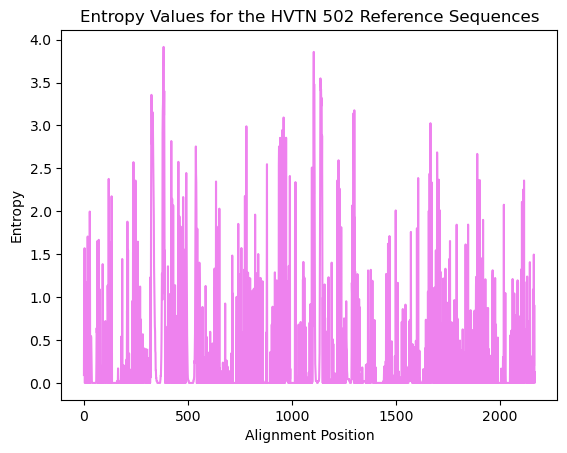

In [41]:
#This code visualizes the entropy of HVTN 502

#x = HVTN_502_seq_data #Nested list so must convert to a 1-dimensional vector

#This code converts the HVTN 502 sequence data to a numerical x-axis
x = list(range(len(HVTN502_entropy))) #List creates a list object of the entropy
y = HVTN502_entropy


plt.plot(x, y, color='violet')
plt.xlabel("Alignment Position")
plt.ylabel("Entropy")
plt.title("Entropy Values for the HVTN 502 Reference Sequences")


Text(0.5, 1.0, 'Entropy Values for the HVTN 503 Reference Sequences')

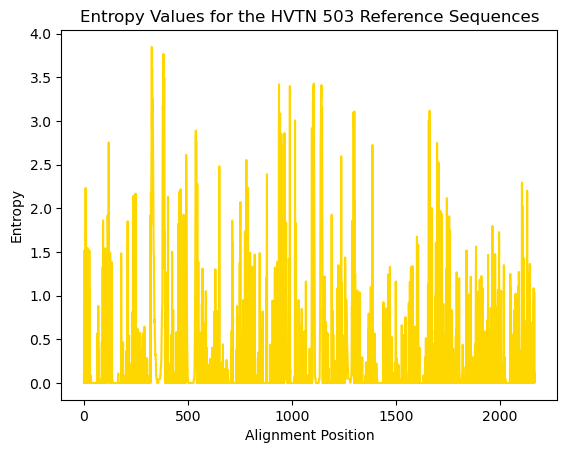

In [34]:
#This code visualizes the entropy of HVTN 503


#This code converts the HVTN 503 sequence data to a numerical x-axis
x = list(range(len(HVTN503_entropy))) #List creates a list object of the entropy
y = HVTN503_entropy


plt.plot(x, y, color='gold')
plt.xlabel("Alignment Position")
plt.ylabel("Entropy")
plt.title("Entropy Values for the HVTN 503 Reference Sequences")

Text(0.5, 1.0, 'Entropy Values for the USMHRP RV144 Reference Sequences')

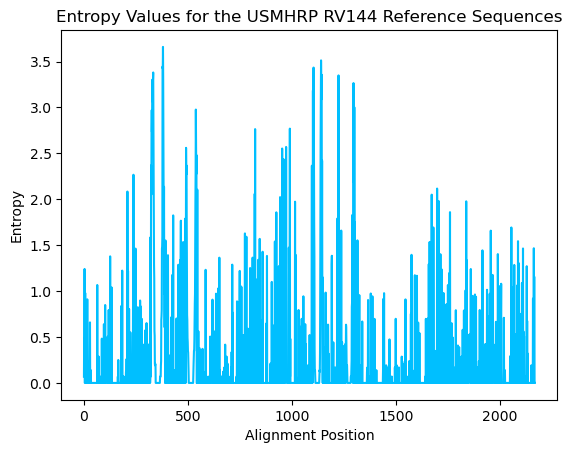

In [49]:
#This code visualizes the entropy of USHMHRP_RV144


#This code converts the RV 144 sequence data to a numerical x-axis
x = list(range(len(USMHRP_RV144_entropy))) #List creates a list object of the entropy
y = USMHRP_RV144_entropy


plt.plot(x, y, color='deepskyblue')
plt.xlabel("Alignment Position")
plt.ylabel("Entropy")
plt.title("Entropy Values for the USMHRP RV144 Reference Sequences")

# DATA PREP

This section preps the data removing the hyper variables regions and sites that are insertions

In [36]:
lanl_map = pd.read_csv("/Users/mmandig/Downloads/lanl_env_aa_2022.map", sep="|")
print(lanl_map)

#print(lanl_map.head(30))


      posNum hxb2Pos hxb2aa
0          1       1      M
1          2       2      R
2          3       3      V
3          4       4      K
4          5      4a      -
...      ...     ...    ...
2164    2165     855      L
2165    2166     856      L
2166    2167    856a      -
2167    2168    856b      -
2168    2169     857      *

[2169 rows x 3 columns]


# Removal of hyper variables in LANL map

This code removes the numbers with letters and the hyper variables in the LANL Map

In [37]:

#This code removes the numbers with letters

lanl_map['hxb2Pos'] = pd.to_numeric(lanl_map['hxb2Pos'], errors='coerce')
lanl_map = lanl_map.dropna()
lanl_map['hxb2Pos'] = lanl_map['hxb2Pos'].astype(int) #Store conversion of type back into Dataframe
print(lanl_map)



      posNum  hxb2Pos hxb2aa
0          1        1      M
1          2        2      R
2          3        3      V
3          4        4      K
6          7        5      E
...      ...      ...    ...
2162    2163      853      R
2163    2164      854      I
2164    2165      855      L
2165    2166      856      L
2168    2169      857      *

[857 rows x 3 columns]


In [67]:
#This code removes the hyper variables in the V1,V2,V4,V5 loop range

lanl_map = lanl_map.drop(lanl_map[
    lanl_map['hxb2Pos'].between(132, 152) |
    lanl_map['hxb2Pos'].between(185, 190) |
    lanl_map['hxb2Pos'].between(396, 410) |
    lanl_map['hxb2Pos'].between(460, 467)
    
    ].index)


print(lanl_map.head(20))



    posNum  hxb2Pos hxb2aa
0        1        1      M
1        2        2      R
2        3        3      V
3        4        4      K
6        7        5      E
7        8        6      K
8        9        7      Y
11      12        8      Q
15      16        9      H
16      17       10      L
18      19       11      W
26      27       12      R
28      29       13      W
29      30       14      G
33      34       15      W
64      65       16      R
65      66       17      W
69      70       18      G
71      72       19      T
77      78       20      M


# Removal of hyper variables in the RV144 Alignment

This code removes the numbers with letters and the hyper variables in the LANL Map

In [42]:
usmhrp_rv144_env_map = pd.read_csv("/Users/mmandig/Downloads/training_studies/rv144/map/env.map", sep="|")
print(usmhrp_rv144_env_map)

      posNum hxb2Pos hxb2aa
0          1       1      M
1          2       2      R
2          3       3      V
3          4       4      K
4          5       5      E
...      ...     ...    ...
1006    1007     853      R
1007    1008     854      I
1008    1009     855      L
1009    1010     856      L
1010    1011     857      *

[1011 rows x 3 columns]


In [43]:
usmhrp_rv144_env_map['hxb2Pos'] = pd.to_numeric(usmhrp_rv144_env_map['hxb2Pos'], errors='coerce')
usmhrp_rv144_env_map = usmhrp_rv144_env_map.dropna()
usmhrp_rv144_env_map['hxb2Pos'] = usmhrp_rv144_env_map['hxb2Pos'].astype(int) #Store conversion of type back into Dataframe
print(usmhrp_rv144_env_map)

      posNum  hxb2Pos hxb2aa
0          1        1      M
1          2        2      R
2          3        3      V
3          4        4      K
4          5        5      E
...      ...      ...    ...
1006    1007      853      R
1007    1008      854      I
1008    1009      855      L
1009    1010      856      L
1010    1011      857      *

[857 rows x 3 columns]


In [64]:
usmhrp_rv144_env_map = usmhrp_rv144_env_map.drop(usmhrp_rv144_env_map[
    usmhrp_rv144_env_map['hxb2Pos'].between(132, 152) |
    usmhrp_rv144_env_map['hxb2Pos'].between(185, 190) |
    usmhrp_rv144_env_map['hxb2Pos'].between(396, 410) |
    usmhrp_rv144_env_map['hxb2Pos'].between(460, 467)
    
    ].index)


print(usmhrp_rv144_env_map.head(20))

    posNum  hxb2Pos hxb2aa
0        1        1      M
1        2        2      R
2        3        3      V
3        4        4      K
4        5        5      E
8        9        6      K
9       10        7      Y
10      11        8      Q
11      12        9      H
12      13       10      L
13      14       11      W
14      15       12      R
15      16       13      W
16      17       14      G
17      18       15      W
18      19       16      R
19      20       17      W
20      21       18      G
21      22       19      T
22      23       20      M


# Calculation In Difference of Position-Wise Entropy

This code calculates the difference of position-wise entropy between the study and the reference sequences

In [80]:
#This code merges the two tables together in order to calculate the difference

merge_lanl_rv144_entropy = pd.merge(usmhrp_rv144_env_map, lanl_map, on='posNum', how='outer')
#merge_lanl_rv144_entropy.rename(columns={"hxb2Pos_y": "lanlmap_hxb2Pos", "hxb2aa_y": "lanlmap_hxb2aa", "hxb2Pos_x": "rv144_hxb2Pos", "hxb2aa_x": "rv144_hxb2aa"})
merge_lanl_rv144_entropy = merge_lanl_rv144_entropy.rename(
    columns={"hxb2Pos_y": "lanlmap_hxb2Pos", 
             "hxb2aa_y": "lanlmap_hxb2aa", 
             "hxb2Pos_x": "rv144_hxb2Pos", 
             "hxb2aa_x": "rv144_hxb2aa"}
)
merge_lanl_rv144_entropy = merge_lanl_rv144_entropy.fillna(0)
merge_lanl_rv144_entropy.head(20)


,posNum,rv144_hxb2Pos,rv144_hxb2aa,lanlmap_hxb2Pos,lanlmap_hxb2aa
0,1,1.0,M,1.0,M
1,2,2.0,R,2.0,R
2,3,3.0,V,3.0,V
3,4,4.0,K,4.0,K
4,5,5.0,E,0.0,0
5,7,0.0,0,5.0,E
6,8,0.0,0,6.0,K
7,9,6.0,K,7.0,Y
8,10,7.0,Y,0.0,0
9,11,8.0,Q,0.0,0


In [110]:
#This code calculates the difference in position wise entropy

difference_positionwise_entropy = merge_lanl_rv144_entropy['rv144_hxb2Pos'] - merge_lanl_rv144_entropy['lanlmap_hxb2Pos']


difference_positionwise_entropy.head(20)


0      0.0
1      0.0
2      0.0
3      0.0
4      5.0
5     -5.0
6     -6.0
7     -1.0
8      7.0
9      8.0
10     1.0
11    10.0
12    11.0
13    12.0
14     4.0
15     4.0
16    15.0
17     5.0
18    17.0
19    18.0
dtype: float64

In [111]:
#This code creates a table for the HXB2 positions with their corresponding Delta H values



#difference_table = merge_lanl_rv144_entropy[['posNum', 'rv144_hxb2Pos']].copy()
#difference_table['calculated_difference'] = merge_lanl_rv144_entropy['rv144_hxb2Pos'] - merge_lanl_rv144_entropy['lanlmap_hxb2Pos']
#difference_table = difference_table.rename(columns={"posNum": "position", "calculated_difference": "delta.H"})
#difference_table = difference_table.drop(columns=['rv144_hxb2Pos'])

# Create a new DataFrame with position and calculated difference
difference_table = merge_lanl_rv144_entropy[['posNum']].copy()

# Ensure numerical conversion to avoid dtype issues
merge_lanl_rv144_entropy['rv144_hxb2Pos'] = pd.to_numeric(merge_lanl_rv144_entropy['rv144_hxb2Pos'], errors='coerce')
merge_lanl_rv144_entropy['lanlmap_hxb2Pos'] = pd.to_numeric(merge_lanl_rv144_entropy['lanlmap_hxb2Pos'], errors='coerce')

# Calculate the difference
difference_table['difference_positionwise_entropy'] = merge_lanl_rv144_entropy['rv144_hxb2Pos'] - merge_lanl_rv144_entropy['lanlmap_hxb2Pos']

# Rename for clarity
difference_table = difference_table.rename(columns={"posNum": "position"})

# Display the first 20 rows
difference_table.head(20)



,position,difference_positionwise_entropy
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,5.0
5,7,-5.0
6,8,-6.0
7,9,-1.0
8,10,7.0
9,11,8.0
